# Analysis of item parameter values for the 4 datasets


To run the code below, you must upload all "irt_item_param_*.csv" files to google colab content path.


In [ ]:
!pip install adjustText
!pip install catsim

from catsim.irt import icc, inf
from scipy.interpolate import interp1d
import numpy as np

import catsim.plot as catplot
import math
import pandas as pd
import statistics as sts
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from numpy import linspace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        if(len(df_norm[column].unique()) > 1): #fix NaN generation
          df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        else:
          df_norm[column] = 0
    return df_norm

def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()

    return df_std

#trata outliers dificudade
def trataOutliersDif(listDif):
  limMin = -4
  limMax =  4
  for i, val in enumerate(listDif):
    if val > limMax:
      listDif[i] = limMax
    else:
      if val < limMin:
        listDif[i] = limMin
  return listDif

def trataOutliersDis(listDis):
  limMin = -2.5
  limMax =  2.5
  for i, val in enumerate(listDis):
    if val > limMax:
      listDis[i] = limMax
    else:
      if val < limMin:
        listDis[i] = limMin
  return listDis

def trataOutliersGues(listGues):
  limMin = 0
  limMax =  1
  for i, val in enumerate(listGues):
    if val > limMax:
      listGues[i] = limMax
    else:
      if val < limMin:
        listGues[i] = limMin
  return listGues

## Identification of general means and medians

reading: irt_item_param_credit-g_m1.csv
Model Name: m1
Discriminação: 1.6535
Dificuldade: -0.056499999999999995
Adivinhação: 0.1495


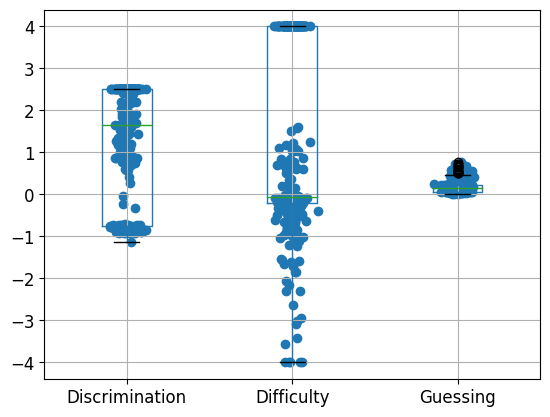

In [ ]:

def calc2(data):
  return sts.median(data)

model_name = 'm1'
pre_name = 'irt_item_param_'

#C0
data_name = 'credit-g'
#data_name = 'kr-vs-kp'
#data_name = 'ozone-level-8hr'
#data_name = 'monks-problems-1'
#data_name = 'monks-problems-2'
#data_name = 'monks-problems-3'
#data_name = 'tic-tac-toe'

#C1
#data_name = 'analcatdata_lawsuit'
#data_name = 'churn'

final_name = '_'+model_name+'.csv'


mean_discrimicacao = []
mean_dificuldade = []
mean_adivinhacao = []


name_file = pre_name+data_name+final_name
print('reading: '+name_file)
dataset = pd.read_csv(name_file)
dataset = dataset.drop('Unnamed: 0',axis=1)
# = normalize(dataset)
dataset['Dificuldade'] = trataOutliersDif(dataset['Dificuldade'])
dataset['Discriminacao'] = trataOutliersDis(dataset['Discriminacao'])
dataset['Adivinhacao'] = trataOutliersGues(dataset['Adivinhacao'])

mean_discrimicacao = dataset['Discriminacao']
mean_dificuldade = dataset['Dificuldade']
mean_adivinhacao = dataset['Adivinhacao']


df = pd.DataFrame(list(zip(mean_discrimicacao, mean_dificuldade,mean_adivinhacao)),columns =['Discrimination', 'Difficulty','Guessing'])

ax = df.boxplot(rot=0,fontsize=12,column=['Discrimination', 'Difficulty','Guessing'])

y = list(zip(mean_discrimicacao, mean_dificuldade,mean_adivinhacao))
x = list(zip(np.random.normal(0 + 1, 0.04, len(y)),np.random.normal(1 + 1, 0.04, len(y)),np.random.normal(2 + 1, 0.04, len(y))))
plt.scatter(x, y)


#ax.set_ylim(-1, 1)
print('Model Name: '+model_name)
print('Discriminação: '+str(calc2(mean_discrimicacao)))
print('Dificuldade: '+str(calc2(mean_dificuldade)))
print('Adivinhação: '+str(calc2(mean_adivinhacao)))

lim_discriminacao = (mean_discrimicacao)
lim_dificuldade = (mean_dificuldade)
lim_adivinhacao = (mean_adivinhacao)


## Dataset credit-g

In [ ]:
def calc(a):
  return a[2]

reading: irt_item_param_credit-g_m1.csv


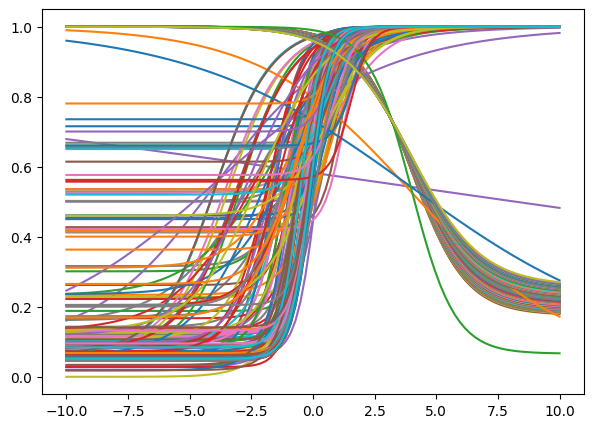

In [ ]:

pre_name = 'irt_item_param_'

model_name = 'm1'
list_dataset = ['credit-g']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset




means_discriminacao_dataset0 = []
means_dificuldade_dataset0 = []
means_adivinhacao_dataset0 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset0 = pd.read_csv(name_file)
  dataset0 = dataset0.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset0['Dificuldade'] = trataOutliersDif(dataset0['Dificuldade'])
  dataset0['Discriminacao'] = trataOutliersDis(dataset0['Discriminacao'])
  dataset0['Adivinhacao'] = trataOutliersGues(dataset0['Adivinhacao'])

  means_discriminacao_dataset0.append(calc(dataset0['Discriminacao']))
  means_dificuldade_dataset0.append(calc(dataset0['Dificuldade']))
  means_adivinhacao_dataset0.append(calc(dataset0['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset0['Dificuldade']):
  a = dataset0['Discriminacao'][i]
  b = dataset0['Dificuldade'][i]
  c = dataset0['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


reading: irt_item_param_credit-g_m2.csv


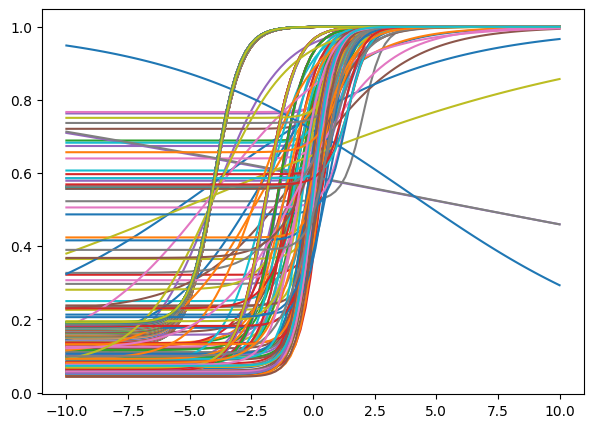

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm2'
list_dataset = ['credit-g']

final_name = '_'+model_name+'.csv'
list_exec = list_dataset


means_discriminacao_dataset1 = []
means_dificuldade_dataset1 = []
means_adivinhacao_dataset1 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset1 = pd.read_csv(name_file)
  dataset1 = dataset1.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset1['Dificuldade'] = trataOutliersDif(dataset1['Dificuldade'])
  dataset1['Discriminacao'] = trataOutliersDis(dataset1['Discriminacao'])
  dataset1['Adivinhacao'] = trataOutliersGues(dataset1['Adivinhacao'])

  means_discriminacao_dataset1.append(calc(dataset1['Discriminacao']))
  means_dificuldade_dataset1.append(calc(dataset1['Dificuldade']))
  means_adivinhacao_dataset1.append(calc(dataset1['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset1['Dificuldade']):
  a = dataset1['Discriminacao'][i]
  b = dataset1['Dificuldade'][i]
  c = dataset1['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_credit-g_m3.csv


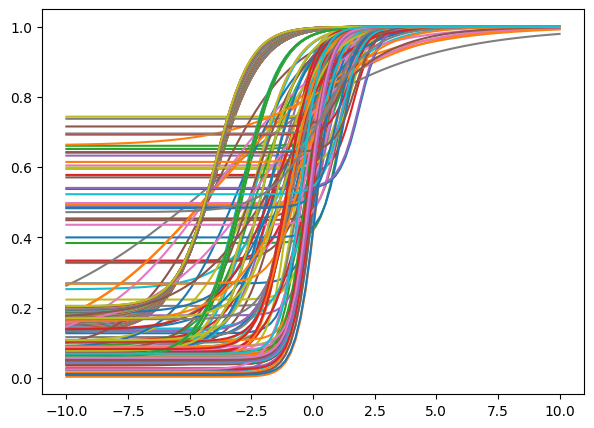

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm3'
list_dataset = ['credit-g']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset2 = []
means_dificuldade_dataset2 = []
means_adivinhacao_dataset2 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset2 = pd.read_csv(name_file)
  dataset2 = dataset2.drop('Unnamed: 0',axis=1)

  dataset2['Dificuldade'] = trataOutliersDif(dataset2['Dificuldade'])
  dataset2['Discriminacao'] = trataOutliersDis(dataset2['Discriminacao'])
  dataset2['Adivinhacao'] = trataOutliersGues(dataset2['Adivinhacao'])

  means_discriminacao_dataset2.append(calc(dataset2['Discriminacao']))
  means_dificuldade_dataset2.append(calc(dataset2['Dificuldade']))
  means_adivinhacao_dataset2.append(calc(dataset2['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset2['Dificuldade']):
  a = dataset2['Discriminacao'][i]
  b = dataset2['Dificuldade'][i]
  c = dataset2['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_credit-g_m4.csv


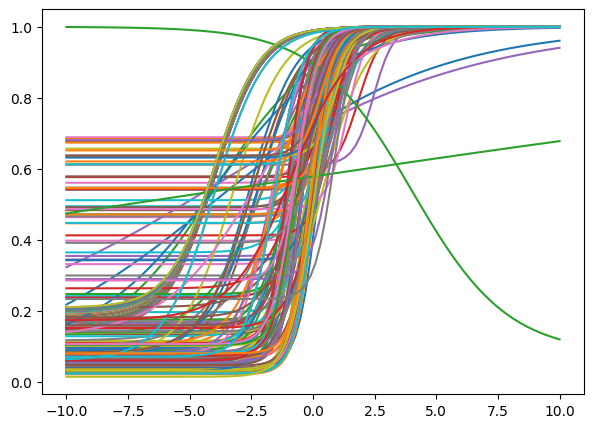

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm4'
list_dataset = ['credit-g']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset3 = []
means_dificuldade_dataset3 = []
means_adivinhacao_dataset3 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset3 = pd.read_csv(name_file)
  dataset3 = dataset3.drop('Unnamed: 0',axis=1)

  dataset3['Dificuldade'] = trataOutliersDif(dataset3['Dificuldade'])
  dataset3['Discriminacao'] = trataOutliersDis(dataset3['Discriminacao'])
  dataset3['Adivinhacao'] = trataOutliersGues(dataset3['Adivinhacao'])

  means_discriminacao_dataset3.append(calc(dataset3['Discriminacao']))
  means_dificuldade_dataset3.append(calc(dataset3['Dificuldade']))
  means_adivinhacao_dataset3.append(calc(dataset3['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset3['Dificuldade']):
  a = dataset3['Discriminacao'][i]
  b = dataset3['Dificuldade'][i]
  c = dataset3['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

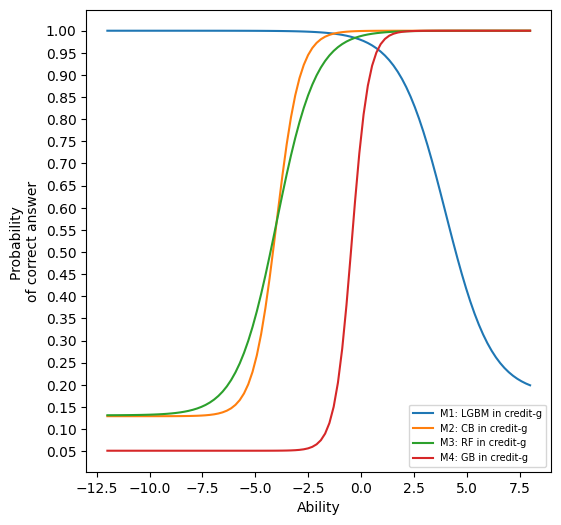

In [ ]:
plt.figure(figsize=(6,6))


x_axis = linspace(-12, 8, 100)

for i,val in enumerate(means_discriminacao_dataset0):

  a = means_discriminacao_dataset0[i]
  b = means_dificuldade_dataset0[i]
  c = means_adivinhacao_dataset0[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.yticks(np.arange(-2,2,0.05))
  ax = plt.plot(x_axis, y_axis)


  a = means_discriminacao_dataset1[i]
  b = means_dificuldade_dataset1[i]
  c = means_adivinhacao_dataset1[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset2[i]
  b = means_dificuldade_dataset2[i]
  c = means_adivinhacao_dataset2[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset3[i]
  b = means_dificuldade_dataset3[i]
  c = means_adivinhacao_dataset3[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('Ability',fontsize=10)
  plt.ylabel('Probability \nof correct answer',fontsize=10)

  plt.legend(['M1: LGBM in credit-g','M2: CB in credit-g','M3: RF in credit-g','M4: GB in credit-g'],fontsize=7)

plt.savefig('cci_credit-g.pdf')

## Dataset ozone-level-8hr

reading: irt_item_param_ozone-level-8hr_m1.csv


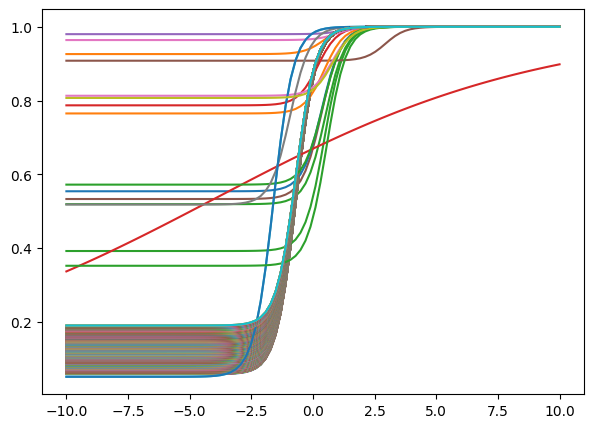

In [ ]:
def calc(a):
  return a[0]
pre_name = 'irt_item_param_'

model_name = 'm1'
list_dataset = ['ozone-level-8hr']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset0 = []
means_dificuldade_dataset0 = []
means_adivinhacao_dataset0 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset0 = pd.read_csv(name_file)
  dataset0 = dataset0.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset0['Dificuldade'] = trataOutliersDif(dataset0['Dificuldade'])
  dataset0['Discriminacao'] = trataOutliersDis(dataset0['Discriminacao'])
  dataset0['Adivinhacao'] = trataOutliersGues(dataset0['Adivinhacao'])

  means_discriminacao_dataset0.append(calc(dataset0['Discriminacao']))
  means_dificuldade_dataset0.append(calc(dataset0['Dificuldade']))
  means_adivinhacao_dataset0.append(calc(dataset0['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset0['Dificuldade']):
  a = dataset0['Discriminacao'][i]
  b = dataset0['Dificuldade'][i]
  c = dataset0['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


reading: irt_item_param_ozone-level-8hr_m2.csv


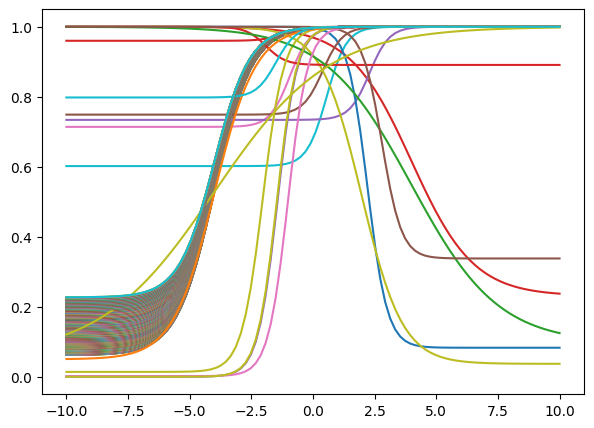

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm2'
list_dataset = ['ozone-level-8hr']

final_name = '_'+model_name+'.csv'
list_exec = list_dataset


means_discriminacao_dataset1 = []
means_dificuldade_dataset1 = []
means_adivinhacao_dataset1 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset1 = pd.read_csv(name_file)
  dataset1 = dataset1.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset1['Dificuldade'] = trataOutliersDif(dataset1['Dificuldade'])
  dataset1['Discriminacao'] = trataOutliersDis(dataset1['Discriminacao'])
  dataset1['Adivinhacao'] = trataOutliersGues(dataset1['Adivinhacao'])

  means_discriminacao_dataset1.append(calc(dataset1['Discriminacao']))
  means_dificuldade_dataset1.append(calc(dataset1['Dificuldade']))
  means_adivinhacao_dataset1.append(calc(dataset1['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset1['Dificuldade']):
  a = dataset1['Discriminacao'][i]
  b = dataset1['Dificuldade'][i]
  c = dataset1['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_ozone-level-8hr_m3.csv


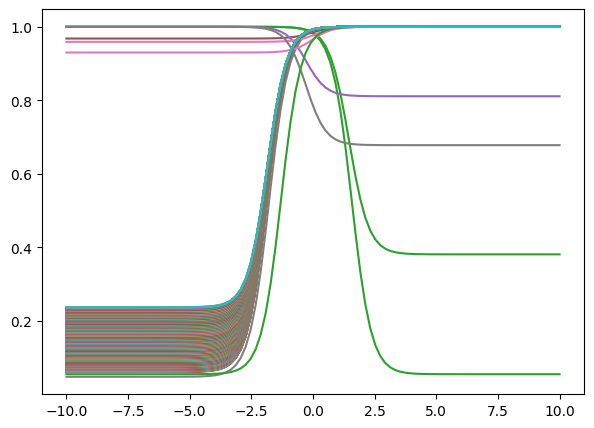

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm3'
list_dataset = ['ozone-level-8hr']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset2 = []
means_dificuldade_dataset2 = []
means_adivinhacao_dataset2 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset2 = pd.read_csv(name_file)
  dataset2 = dataset2.drop('Unnamed: 0',axis=1)

  dataset2['Dificuldade'] = trataOutliersDif(dataset2['Dificuldade'])
  dataset2['Discriminacao'] = trataOutliersDis(dataset2['Discriminacao'])
  dataset2['Adivinhacao'] = trataOutliersGues(dataset2['Adivinhacao'])

  means_discriminacao_dataset2.append(calc(dataset2['Discriminacao']))
  means_dificuldade_dataset2.append(calc(dataset2['Dificuldade']))
  means_adivinhacao_dataset2.append(calc(dataset2['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset2['Dificuldade']):
  a = dataset2['Discriminacao'][i]
  b = dataset2['Dificuldade'][i]
  c = dataset2['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_ozone-level-8hr_m4.csv


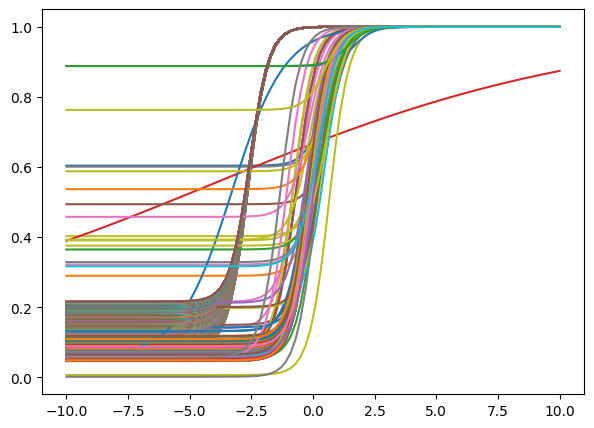

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm4'
list_dataset = ['ozone-level-8hr']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset3 = []
means_dificuldade_dataset3 = []
means_adivinhacao_dataset3 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset3 = pd.read_csv(name_file)
  dataset3 = dataset3.drop('Unnamed: 0',axis=1)

  dataset3['Dificuldade'] = trataOutliersDif(dataset3['Dificuldade'])
  dataset3['Discriminacao'] = trataOutliersDis(dataset3['Discriminacao'])
  dataset3['Adivinhacao'] = trataOutliersGues(dataset3['Adivinhacao'])

  means_discriminacao_dataset3.append(calc(dataset3['Discriminacao']))
  means_dificuldade_dataset3.append(calc(dataset3['Dificuldade']))
  means_adivinhacao_dataset3.append(calc(dataset3['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset3['Dificuldade']):
  a = dataset3['Discriminacao'][i]
  b = dataset3['Dificuldade'][i]
  c = dataset3['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

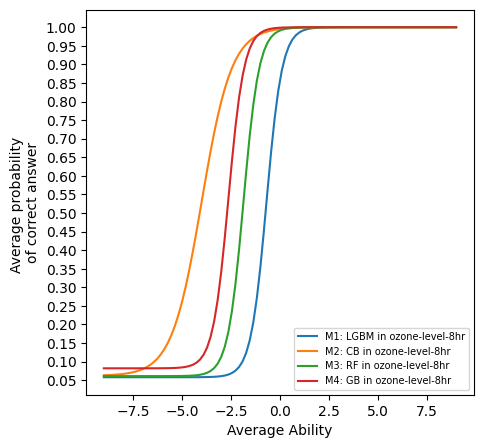

In [ ]:
plt.figure(figsize=(5,5))


x_axis = linspace(-9, 9, 100)

for i,val in enumerate(means_discriminacao_dataset0):
  #Cluster ozone
  a = means_discriminacao_dataset0[i]
  b = means_dificuldade_dataset0[i]
  c = means_adivinhacao_dataset0[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.yticks(np.arange(-2,2,0.05))
  ax = plt.plot(x_axis, y_axis)


  a = means_discriminacao_dataset1[i]
  b = means_dificuldade_dataset1[i]
  c = means_adivinhacao_dataset1[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset2[i]
  b = means_dificuldade_dataset2[i]
  c = means_adivinhacao_dataset2[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset3[i]
  b = means_dificuldade_dataset3[i]
  c = means_adivinhacao_dataset3[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('Average Ability',fontsize=10)
  plt.ylabel('Average probability \nof correct answer',fontsize=10)

  plt.legend(['M1: LGBM in ozone-level-8hr','M2: CB in ozone-level-8hr','M3: RF in ozone-level-8hr','M4: GB in ozone-level-8hr'],fontsize=7)

plt.savefig('mean_cci.pdf')

## Dataset PhishingWebsites

reading: irt_item_param_PhishingWebsites_m1.csv


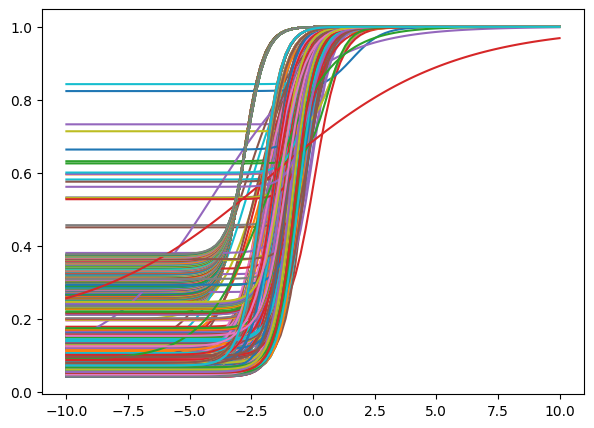

In [ ]:
def calc(a):
  return a[10]
pre_name = 'irt_item_param_'

model_name = 'm1'
list_dataset = ['PhishingWebsites']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset0 = []
means_dificuldade_dataset0 = []
means_adivinhacao_dataset0 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset0 = pd.read_csv(name_file)
  dataset0 = dataset0.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset0['Dificuldade'] = trataOutliersDif(dataset0['Dificuldade'])
  dataset0['Discriminacao'] = trataOutliersDis(dataset0['Discriminacao'])
  dataset0['Adivinhacao'] = trataOutliersGues(dataset0['Adivinhacao'])

  means_discriminacao_dataset0.append(calc(dataset0['Discriminacao']))
  means_dificuldade_dataset0.append(calc(dataset0['Dificuldade']))
  means_adivinhacao_dataset0.append(calc(dataset0['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset0['Dificuldade']):
  a = dataset0['Discriminacao'][i]
  b = dataset0['Dificuldade'][i]
  c = dataset0['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


reading: irt_item_param_PhishingWebsites_m2.csv


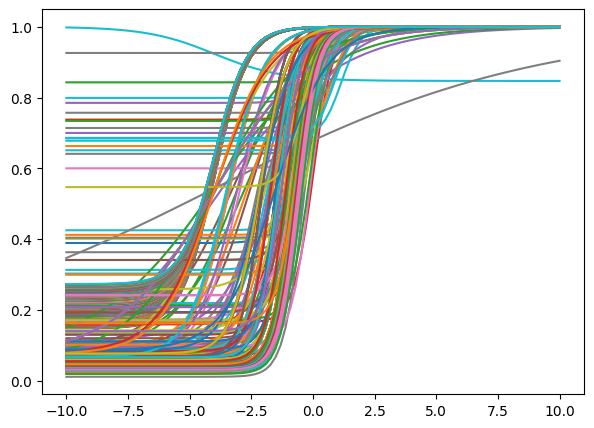

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm2'
list_dataset = ['PhishingWebsites']

final_name = '_'+model_name+'.csv'
list_exec = list_dataset


means_discriminacao_dataset1 = []
means_dificuldade_dataset1 = []
means_adivinhacao_dataset1 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset1 = pd.read_csv(name_file)
  dataset1 = dataset1.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset1['Dificuldade'] = trataOutliersDif(dataset1['Dificuldade'])
  dataset1['Discriminacao'] = trataOutliersDis(dataset1['Discriminacao'])
  dataset1['Adivinhacao'] = trataOutliersGues(dataset1['Adivinhacao'])

  means_discriminacao_dataset1.append(calc(dataset1['Discriminacao']))
  means_dificuldade_dataset1.append(calc(dataset1['Dificuldade']))
  means_adivinhacao_dataset1.append(calc(dataset1['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset1['Dificuldade']):
  a = dataset1['Discriminacao'][i]
  b = dataset1['Dificuldade'][i]
  c = dataset1['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_PhishingWebsites_m3.csv


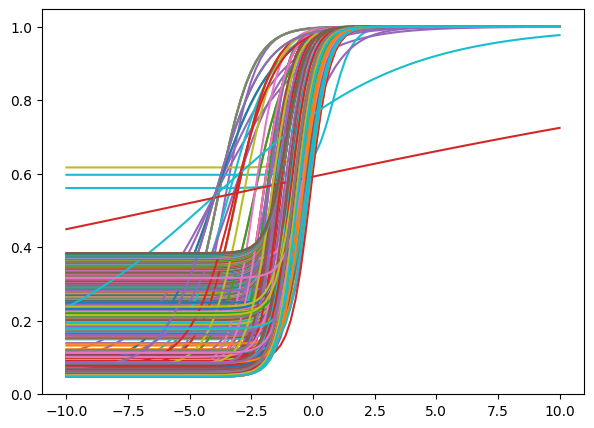

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm3'
list_dataset = ['PhishingWebsites']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset2 = []
means_dificuldade_dataset2 = []
means_adivinhacao_dataset2 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset2 = pd.read_csv(name_file)
  dataset2 = dataset2.drop('Unnamed: 0',axis=1)

  dataset2['Dificuldade'] = trataOutliersDif(dataset2['Dificuldade'])
  dataset2['Discriminacao'] = trataOutliersDis(dataset2['Discriminacao'])
  dataset2['Adivinhacao'] = trataOutliersGues(dataset2['Adivinhacao'])

  means_discriminacao_dataset2.append(calc(dataset2['Discriminacao']))
  means_dificuldade_dataset2.append(calc(dataset2['Dificuldade']))
  means_adivinhacao_dataset2.append(calc(dataset2['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset2['Dificuldade']):
  a = dataset2['Discriminacao'][i]
  b = dataset2['Dificuldade'][i]
  c = dataset2['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_PhishingWebsites_m4.csv


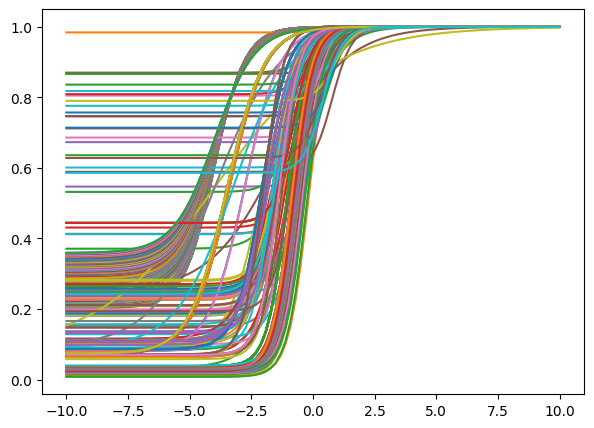

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm4'
list_dataset = ['PhishingWebsites']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset3 = []
means_dificuldade_dataset3 = []
means_adivinhacao_dataset3 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset3 = pd.read_csv(name_file)
  dataset3 = dataset3.drop('Unnamed: 0',axis=1)

  dataset3['Dificuldade'] = trataOutliersDif(dataset3['Dificuldade'])
  dataset3['Discriminacao'] = trataOutliersDis(dataset3['Discriminacao'])
  dataset3['Adivinhacao'] = trataOutliersGues(dataset3['Adivinhacao'])

  means_discriminacao_dataset3.append(calc(dataset3['Discriminacao']))
  means_dificuldade_dataset3.append(calc(dataset3['Dificuldade']))
  means_adivinhacao_dataset3.append(calc(dataset3['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset3['Dificuldade']):
  a = dataset3['Discriminacao'][i]
  b = dataset3['Dificuldade'][i]
  c = dataset3['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

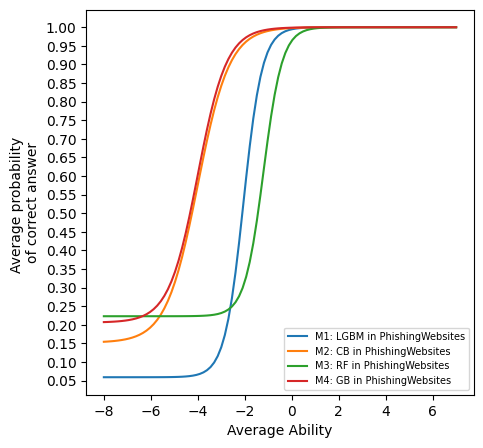

In [ ]:
plt.figure(figsize=(5,5))


x_axis = linspace(-8, 7, 100)

for i,val in enumerate(means_discriminacao_dataset0):
  #Cluster ozone
  a = means_discriminacao_dataset0[i]
  b = means_dificuldade_dataset0[i]
  c = means_adivinhacao_dataset0[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.yticks(np.arange(-2,2,0.05))
  ax = plt.plot(x_axis, y_axis)


  a = means_discriminacao_dataset1[i]
  b = means_dificuldade_dataset1[i]
  c = means_adivinhacao_dataset1[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset2[i]
  b = means_dificuldade_dataset2[i]
  c = means_adivinhacao_dataset2[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset3[i]
  b = means_dificuldade_dataset3[i]
  c = means_adivinhacao_dataset3[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('Average Ability',fontsize=10)
  plt.ylabel('Average probability \nof correct answer',fontsize=10)

  plt.legend(['M1: LGBM in PhishingWebsites','M2: CB in PhishingWebsites','M3: RF in PhishingWebsites','M4: GB in PhishingWebsites'],fontsize=7)

plt.savefig('cci_phising.pdf')

## Dataset diabetes

reading: irt_item_param_diabetes_m1.csv


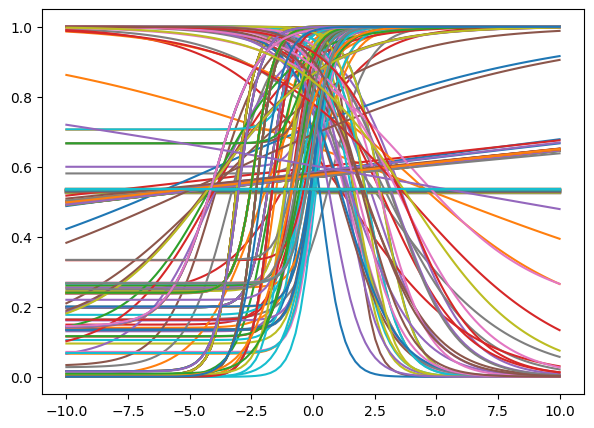

In [ ]:
def calc(a):
  return a[7]
pre_name = 'irt_item_param_'

model_name = 'm1'
list_dataset = ['diabetes']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset0 = []
means_dificuldade_dataset0 = []
means_adivinhacao_dataset0 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset0 = pd.read_csv(name_file)
  dataset0 = dataset0.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset0['Dificuldade'] = trataOutliersDif(dataset0['Dificuldade'])
  dataset0['Discriminacao'] = trataOutliersDis(dataset0['Discriminacao'])
  dataset0['Adivinhacao'] = trataOutliersGues(dataset0['Adivinhacao'])

  means_discriminacao_dataset0.append(calc(dataset0['Discriminacao']))
  means_dificuldade_dataset0.append(calc(dataset0['Dificuldade']))
  means_adivinhacao_dataset0.append(calc(dataset0['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset0['Dificuldade']):
  a = dataset0['Discriminacao'][i]
  b = dataset0['Dificuldade'][i]
  c = dataset0['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


reading: irt_item_param_diabetes_m2.csv


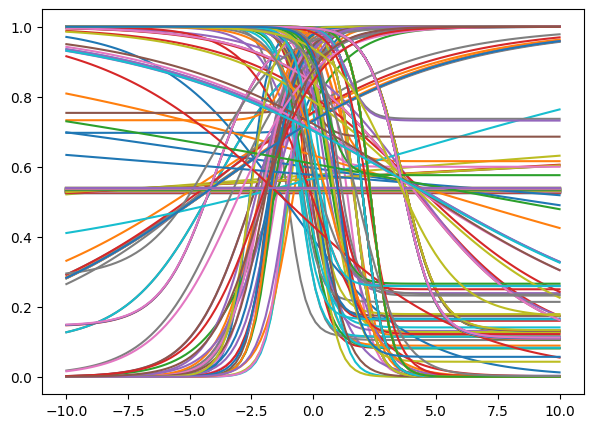

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm2'
list_dataset = ['diabetes']

final_name = '_'+model_name+'.csv'
list_exec = list_dataset


means_discriminacao_dataset1 = []
means_dificuldade_dataset1 = []
means_adivinhacao_dataset1 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset1 = pd.read_csv(name_file)
  dataset1 = dataset1.drop('Unnamed: 0',axis=1)
  #dataset0 = normalize(dataset0)
  dataset1['Dificuldade'] = trataOutliersDif(dataset1['Dificuldade'])
  dataset1['Discriminacao'] = trataOutliersDis(dataset1['Discriminacao'])
  dataset1['Adivinhacao'] = trataOutliersGues(dataset1['Adivinhacao'])

  means_discriminacao_dataset1.append(calc(dataset1['Discriminacao']))
  means_dificuldade_dataset1.append(calc(dataset1['Dificuldade']))
  means_adivinhacao_dataset1.append(calc(dataset1['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset1['Dificuldade']):
  a = dataset1['Discriminacao'][i]
  b = dataset1['Dificuldade'][i]
  c = dataset1['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_diabetes_m3.csv


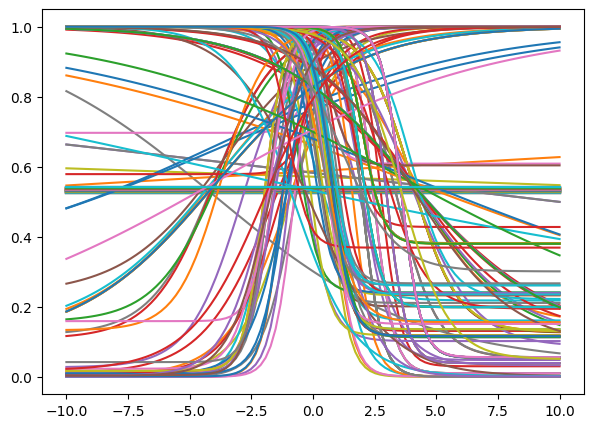

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm3'
list_dataset = ['diabetes']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset2 = []
means_dificuldade_dataset2 = []
means_adivinhacao_dataset2 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset2 = pd.read_csv(name_file)
  dataset2 = dataset2.drop('Unnamed: 0',axis=1)

  dataset2['Dificuldade'] = trataOutliersDif(dataset2['Dificuldade'])
  dataset2['Discriminacao'] = trataOutliersDis(dataset2['Discriminacao'])
  dataset2['Adivinhacao'] = trataOutliersGues(dataset2['Adivinhacao'])

  means_discriminacao_dataset2.append(calc(dataset2['Discriminacao']))
  means_dificuldade_dataset2.append(calc(dataset2['Dificuldade']))
  means_adivinhacao_dataset2.append(calc(dataset2['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset2['Dificuldade']):
  a = dataset2['Discriminacao'][i]
  b = dataset2['Dificuldade'][i]
  c = dataset2['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

reading: irt_item_param_diabetes_m4.csv


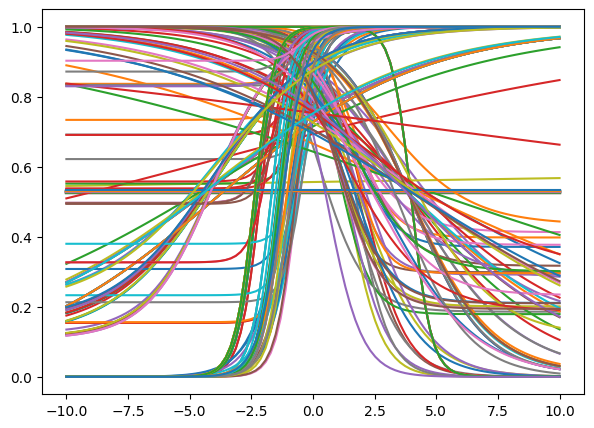

In [ ]:
pre_name = 'irt_item_param_'

model_name = 'm4'
list_dataset = ['diabetes']

final_name = '_'+model_name+'.csv'

list_exec = list_dataset


means_discriminacao_dataset3 = []
means_dificuldade_dataset3 = []
means_adivinhacao_dataset3 = []


for i,data_name in enumerate(list_exec):
  name_file = pre_name+data_name+final_name
  print('reading: '+name_file)
  dataset3 = pd.read_csv(name_file)
  dataset3 = dataset3.drop('Unnamed: 0',axis=1)

  dataset3['Dificuldade'] = trataOutliersDif(dataset3['Dificuldade'])
  dataset3['Discriminacao'] = trataOutliersDis(dataset3['Discriminacao'])
  dataset3['Adivinhacao'] = trataOutliersGues(dataset3['Adivinhacao'])

  means_discriminacao_dataset3.append(calc(dataset3['Discriminacao']))
  means_dificuldade_dataset3.append(calc(dataset3['Dificuldade']))
  means_adivinhacao_dataset3.append(calc(dataset3['Adivinhacao']))

plt.figure(figsize=(7,5))
for i,_ in enumerate(dataset3['Dificuldade']):
  a = dataset3['Discriminacao'][i]
  b = dataset3['Dificuldade'][i]
  c = dataset3['Adivinhacao'][i]
  x_axis = linspace(-10, 10, 100)
  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

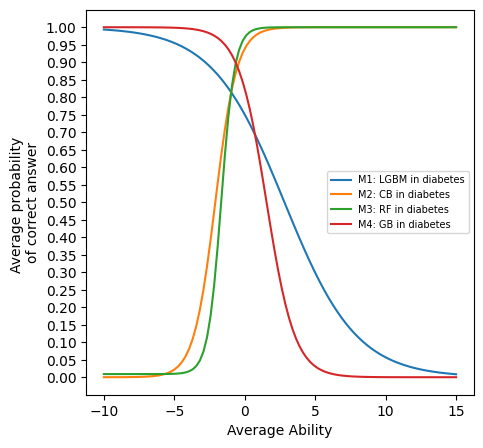

In [ ]:
plt.figure(figsize=(5,5))


x_axis = linspace(-10, 15, 100)

for i,val in enumerate(means_discriminacao_dataset0):
  #Cluster ozone
  a = means_discriminacao_dataset0[i]
  b = means_dificuldade_dataset0[i]
  c = means_adivinhacao_dataset0[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.yticks(np.arange(-2,2,0.05))
  ax = plt.plot(x_axis, y_axis)


  a = means_discriminacao_dataset1[i]
  b = means_dificuldade_dataset1[i]
  c = means_adivinhacao_dataset1[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset2[i]
  b = means_dificuldade_dataset2[i]
  c = means_adivinhacao_dataset2[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)

  a = means_discriminacao_dataset3[i]
  b = means_dificuldade_dataset3[i]
  c = means_adivinhacao_dataset3[i]

  y_axis = c + (1 - c) * (1/(1+math.e**(-a*(x_axis - b))))

  plt.plot(x_axis, y_axis)


  plt.xlabel('Average Ability',fontsize=10)
  plt.ylabel('Average probability \nof correct answer',fontsize=10)

  plt.legend(['M1: LGBM in diabetes','M2: CB in diabetes','M3: RF in diabetes','M4: GB in diabetes'],fontsize=7)

plt.savefig('cci_diabetes.pdf')

## Save

In [ ]:
from google.colab import files

In [ ]:
!zip -r '/content/workspace_m1-m4_4datasets.zip' /content
files.download('/content/workspace_m1-m4_4datasets.zip')

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.05.26/ (stored 0%)
  adding: content/.config/logs/2023.05.26/13.47.20.430721.log (deflated 86%)
  adding: content/.config/logs/2023.05.26/13.47.55.044066.log (deflated 57%)
  adding: content/.config/logs/2023.05.26/13.47.55.757168.log (deflated 56%)
  adding: content/.config/logs/2023.05.26/13.46.55.291565.log (deflated 58%)
  adding: content/.config/logs/2023.05.26/13.46.28.642850.log (deflated 91%)
  adding: content/.config/logs/2023.05.26/13.47.28.632090.log (deflated 58%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/conf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>